In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import *
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv(r"C:\Users\albeb\Downloads\aw_fb_data.csv\aw_fb_data.csv")
data.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


## Analisi esplorativa

<AxesSubplot:>

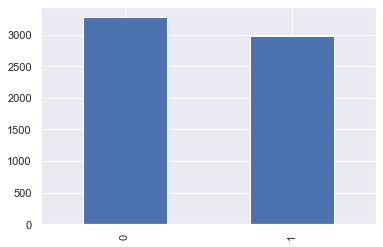

In [4]:
data['gender'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='gender'>

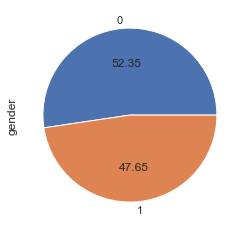

In [5]:
data['gender'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:>

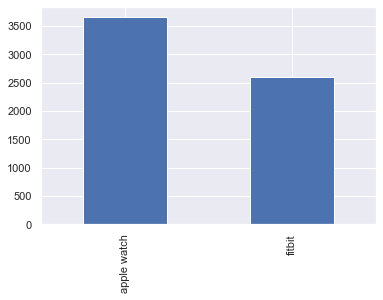

In [6]:
data['device'].value_counts().plot(kind='bar')

<AxesSubplot:>

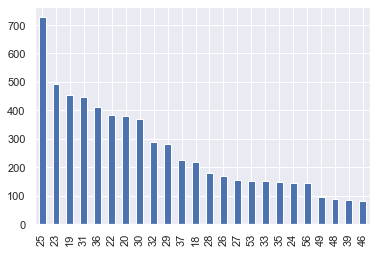

In [7]:
data['age'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='activity'>

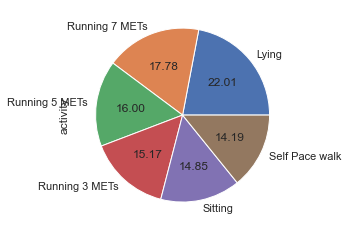

In [8]:
data['activity'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:>

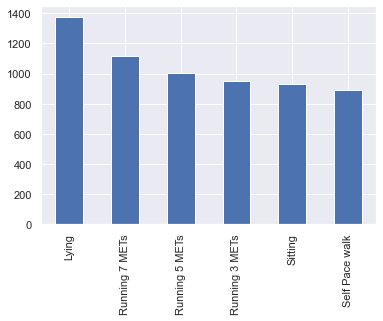

In [9]:
data['activity'].value_counts().plot(kind='bar')

C:\Users\albeb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

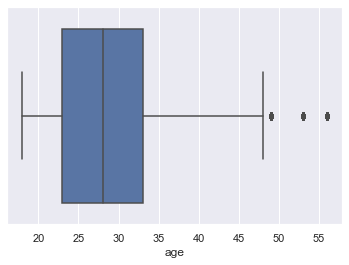

In [10]:
sns.boxplot(data['age'])

C:\Users\albeb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

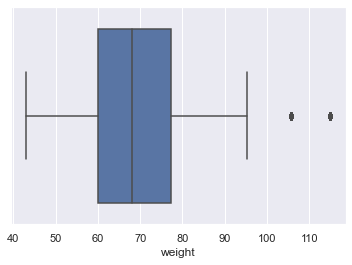

In [11]:
sns.boxplot(data['weight'])

<AxesSubplot:xlabel='weight', ylabel='height'>

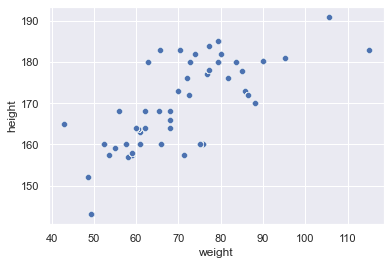

In [12]:
sns.scatterplot(x=data['weight'],y=data['height'])

In [13]:
df= data.drop(['device','Unnamed: 0','X1','entropy_heart', 'entropy_setps',
                'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
                'sd_norm_heart', 'steps_times_distance'], axis=1)

In [14]:
df.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,resting_heart,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,59.0,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,59.0,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,59.0,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,59.0,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,59.0,Lying


In [15]:
df.describe()

,age,gender,height,weight,steps,hear_rate,calories,distance,resting_heart
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,65.869938
std,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,21.203017
min,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,3.000000
25%,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,58.134333
50%,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,75.000000
75%,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,76.138701
max,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,155.000000


In [16]:
df.corr()

,age,gender,height,weight,steps,hear_rate,calories,distance,resting_heart
age,1.000000,-0.236032,-0.518798,-0.152317,0.006394,-0.007665,-0.064661,-0.061169,-0.022833
gender,-0.236032,1.000000,0.735852,0.580446,-0.069719,-0.093476,0.071875,-0.051779,-0.082235
height,-0.518798,0.735852,1.000000,0.693504,0.025729,-0.123519,0.034447,-0.091422,-0.028330
weight,-0.152317,0.580446,0.693504,1.000000,0.045389,-0.064317,-0.023612,-0.072294,-0.014345
steps,0.006394,-0.069719,0.025729,0.045389,1.000000,0.164084,-0.250973,-0.090433,0.083964
hear_rate,-0.007665,-0.093476,-0.123519,-0.064317,0.164084,1.000000,-0.141972,-0.068879,0.382275
calories,-0.064661,0.071875,0.034447,-0.023612,-0.250973,-0.141972,1.000000,0.255145,-0.055703
distance,-0.061169,-0.051779,-0.091422,-0.072294,-0.090433,-0.068879,0.255145,1.000000,-0.320791
resting_heart,-0.022833,-0.082235,-0.028330,-0.014345,0.083964,0.382275,-0.055703,-0.320791,1.000000


(array([1379.,    0.,    0.,    0.,  930.,    0.,    0.,    0.,  889.,
           0.,    0.,    0.,  950.,    0.,    0.,    0., 1002.,    0.,
           0., 1114.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

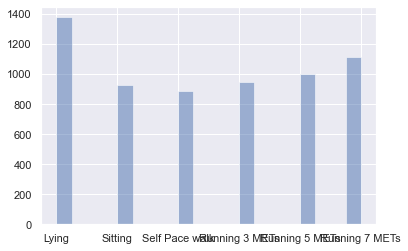

In [17]:
plt.hist(df["activity"], 20,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

In [18]:
label_encoder=LabelEncoder()

In [19]:
encoder=label_encoder.fit(df['activity'])
ac_data1=encoder.transform(df['activity'])

In [20]:
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(mapping)

{'Lying': 0, 'Running 3 METs': 1, 'Running 5 METs': 2, 'Running 7 METs': 3, 'Self Pace walk': 4, 'Sitting': 5}


In [21]:
df['activity']=ac_data1
df.corr()['activity']

age              0.005492
gender          -0.007856
height          -0.006379
weight           0.000687
steps            0.039420
hear_rate        0.041103
calories         0.044977
distance         0.023214
resting_heart   -0.015237
activity         1.000000
Name: activity, dtype: float64

In [22]:
df

,age,gender,height,weight,steps,hear_rate,calories,distance,resting_heart,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,59.0,0
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,59.0,0
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,59.0,0
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,59.0,0
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,59.0,0
...,...,...,...,...,...,...,...,...,...,...
6259,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,35.0,3
6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,35.0,3
6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,35.0,3
6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,35.0,3


In [23]:
resp_var=df['activity']
exp_var=df.drop(columns='activity')

In [24]:
exp_var.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,resting_heart
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,59.0
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,59.0
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,59.0
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,59.0
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,59.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(exp_var, resp_var, test_size = 0.2)

In [26]:
def classificazione_previsione(model, explanatory_test, response_test):
    predict_model = model.predict(explanatory_test)
    predict_proba_model = model.predict_proba(explanatory_test)[:, 1]
    print('Accuracy_model: ', metrics.accuracy_score(response_test, predict_model))
    print(metrics.classification_report(response_test, predict_model))

In [27]:
knn_classification=sklearn.neighbors.KNeighborsClassifier()
knn_classification.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
classificazione_previsione(knn_classification,X_test,y_test)

Accuracy_model:  0.6384676775738228
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       292
           1       0.67      0.69      0.68       200
           2       0.64      0.73      0.68       175
           3       0.75      0.71      0.73       211
           4       0.71      0.75      0.73       177
           5       0.49      0.33      0.39       198

    accuracy                           0.64      1253
   macro avg       0.64      0.64      0.64      1253
weighted avg       0.63      0.64      0.63      1253



In [29]:
albero_dec=sklearn.tree.DecisionTreeClassifier()
albero_dec.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
classificazione_previsione(albero_dec,X_test,y_test)

Accuracy_model:  0.7573822825219473
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       292
           1       0.82      0.80      0.81       200
           2       0.72      0.83      0.77       175
           3       0.85      0.80      0.82       211
           4       0.77      0.79      0.78       177
           5       0.66      0.64      0.65       198

    accuracy                           0.76      1253
   macro avg       0.76      0.76      0.76      1253
weighted avg       0.76      0.76      0.76      1253



In [31]:
model_gb = sklearn.ensemble.GradientBoostingClassifier()
model_gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [32]:
classificazione_previsione(model_gb,X_test,y_test)

Accuracy_model:  0.6943335993615323
              precision    recall  f1-score   support

           0       0.63      0.70      0.67       292
           1       0.74      0.70      0.72       200
           2       0.65      0.78      0.71       175
           3       0.81      0.73      0.77       211
           4       0.71      0.72      0.72       177
           5       0.67      0.54      0.59       198

    accuracy                           0.69      1253
   macro avg       0.70      0.70      0.70      1253
weighted avg       0.70      0.69      0.69      1253



In [33]:
attr=list(X_train.columns)

In [34]:
from sklearn.tree import _tree

def tree_to_code(treein, feature_names):
    tree_ = treein.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [35]:
tree_to_code(albero_dec,attr)

def tree(age, gender, height, weight, steps, hear_rate, calories, distance, resting_heart):
  if steps <= 2.872351288795471:
    if calories <= 5.25:
      if steps <= 1.2127193212509155:
        if height <= 154.75:
          return [[0. 0. 0. 0. 0. 2.]]
        else:  # if height > 154.75
          if age <= 22.5:
            if age <= 21.0:
              if calories <= 4.25:
                if hear_rate <= 133.0:
                  return [[8. 0. 0. 0. 0. 0.]]
                else:  # if hear_rate > 133.0
                  if hear_rate <= 135.92063903808594:
                    return [[0. 0. 0. 0. 1. 0.]]
                  else:  # if hear_rate > 135.92063903808594
                    return [[3. 0. 0. 0. 0. 0.]]
              else:  # if calories > 4.25
                return [[0. 0. 0. 0. 0. 1.]]
            else:  # if age > 21.0
              if hear_rate <= 78.6490364074707:
                if calories <= 2.25:
                  if calories <= 1.5:
                    if hear_r

In [40]:
rndfor= sklearn.ensemble.RandomForestClassifier()
rndfor.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
classificazione_previsione(rndfor,X_test,y_test)

Accuracy_model:  0.8443735035913806
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       292
           1       0.89      0.85      0.87       200
           2       0.82      0.86      0.84       175
           3       0.92      0.90      0.91       211
           4       0.87      0.88      0.87       177
           5       0.74      0.80      0.77       198

    accuracy                           0.84      1253
   macro avg       0.85      0.85      0.85      1253
weighted avg       0.85      0.84      0.84      1253



Text(0.5, 1.0, 'Matrice di Confusione')

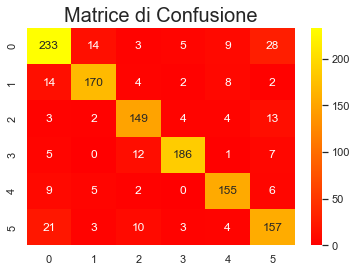

In [38]:
y_predetto = rndfor.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_predetto)
sns.heatmap(cm_xgb, annot = True, fmt = 'g', cmap="autumn")
plt.title("Matrice di Confusione", fontsize = 20)

In [39]:
mlperc= sklearn.neural_network.MLPClassifier()
mlperc.fit(X_train,y_train)

MLPClassifier()

In [134]:
classificazione_previsione(mlperc,X_test,y_test)

Accuracy_model:  0.41500399042298486
              precision    recall  f1-score   support

           0       0.36      0.55      0.44       260
           1       0.57      0.13      0.21       188
           2       0.41      0.47      0.44       202
           3       0.47      0.72      0.57       229
           4       0.40      0.43      0.41       199
           5       0.40      0.03      0.06       175

    accuracy                           0.42      1253
   macro avg       0.44      0.39      0.36      1253
weighted avg       0.43      0.42      0.37      1253



In [257]:
import joblib
joblib.dump(rndfor, 'modello_rand_for.pkl', compress=9)

['modello_rand_for.pkl']

In [214]:
from sktime.classification.sklearn import RotationForest

In [138]:
clf = RotationForest(n_estimators=10)
clf.fit(X_train, y_train)

RotationForest(n_estimators=10)

In [139]:
classificazione_previsione(clf,X_test,y_test)

Accuracy_model:  0.7940941739824421
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       260
           1       0.77      0.88      0.82       188
           2       0.79      0.82      0.80       202
           3       0.91      0.82      0.86       229
           4       0.83      0.80      0.81       199
           5       0.65      0.71      0.68       175

    accuracy                           0.79      1253
   macro avg       0.79      0.80      0.79      1253
weighted avg       0.80      0.79      0.79      1253



In [140]:
classificazione_previsione(rndfor,X_test,y_test)

Accuracy_model:  0.8467677573822825
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       260
           1       0.84      0.90      0.87       188
           2       0.85      0.86      0.86       202
           3       0.93      0.89      0.91       229
           4       0.89      0.82      0.85       199
           5       0.71      0.79      0.75       175

    accuracy                           0.85      1253
   macro avg       0.85      0.85      0.85      1253
weighted avg       0.85      0.85      0.85      1253



In [3]:
print('Scikit-learn version:', sklearn.__version__)

Scikit-learn version: 1.0.2
